<a href="https://colab.research.google.com/github/Theallkeeeymist/Linear_Regression_Implementation/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.datasets import load_breast_cancer, fetch_california_housing

data=fetch_california_housing()
df=pd.DataFrame(data.data, columns=data.feature_names)
df["target"]=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X=df.drop("target", axis=1).values
y=df["target"].values.reshape(-1,1)

X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train.shape

(16512, 8)

In [114]:
y_train.shape

(16512, 1)

In [128]:
# Initialize Parameters
_, n= X_train.shape
w=np.zeros((n,1)) # weights
b=0 # bias
lr=0.01 # learning_rate
epochs=300

In [129]:
print(_, n)

16512 8


In [130]:
def predict(X, w, b):
  return np.dot(X,w)+b # y

losses=[]

for i in range(epochs):
  y_pred=predict(X_train, w, b)
  error=(y_pred-y_train)

  loss=np.mean(error**2)
  losses.append(loss)

  # Gradient
  dw=(1/m)*np.dot(X_train.T, error)
  db=(1/m)*np.sum(error)

  # Update
  w-=lr*dw
  b-=lr*db

print("Final weight: ", w.flatten(), "Bias: ", b)

Final weight:  [ 0.71116506  0.1698347   0.04845037 -0.03908351  0.00474087 -0.03348902
 -0.2034917  -0.15697324] Bias:  1.8832438403223004


In [131]:
# # Visualization
# plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
# plt.plot(X_test, predict(X_test, w, b), color="red", label="Regression Line")
# plt.xlabel("Standardized Mean Radius")
# plt.ylabel("Target")
# plt.legend()
# plt.show()

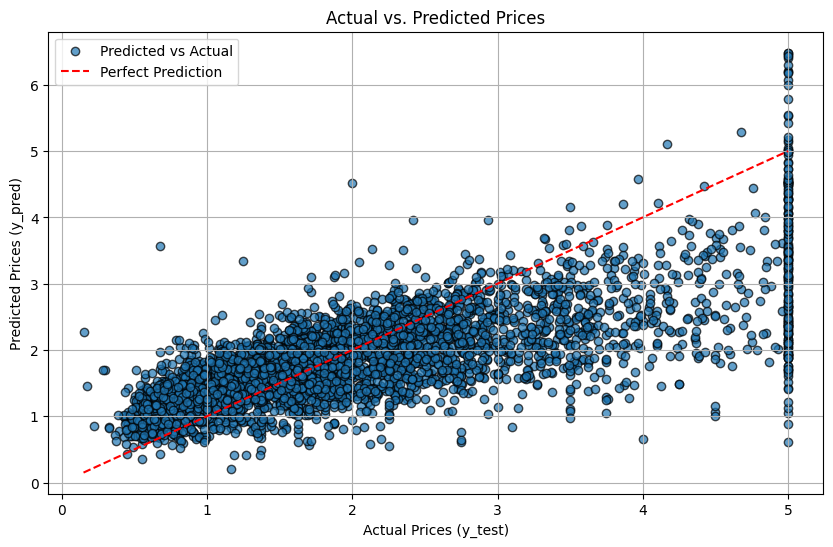

In [132]:
y_pred=predict(X_test, w, b)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted vs Actual')

plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs. Predicted Prices")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()

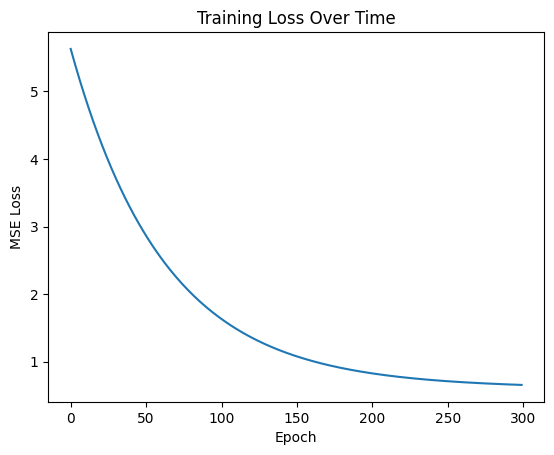

In [133]:
# Loss Curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Time")
plt.show()